In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # For better tick formatting

from matplotlib.ticker import FormatStrFormatter

def load_data_from_json(json_file):
    """
    Loads data from a JSON file into numpy arrays.

    Args:
        json_file (str): Path to the JSON file.

    Returns:
        dict: A dictionary containing the data as numpy arrays.
              Returns None if there's an error.
    """
    try:
        with open(json_file, 'r') as f:
            data = json.load(f)

        bond_lengths = np.array(data['input_data']['bond_lengths'])
        e0 = np.array(data['properties']['energies']['E0'])
        e1 = np.array(data['properties']['energies']['E1'])
        e2 = np.array(data['properties']['energies']['E2'])

        return {
            "bond_lengths": bond_lengths,
            "E0": e0,
            "E1": e1,
            "E2": e2
        }

    except FileNotFoundError:
        print(f"Error: File '{json_file}' not found.")
        return None
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON format in '{json_file}'.")
        return None
    except KeyError as e:
        print(f"Error: Missing key '{e.args[0]}' in JSON data.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


def create_energy_plot(data, output_filename="energy_vs_bondlength.png",
                        title="Energy vs. Bond Length",
                        colors=['red', 'blue', 'green'],
                        linestyles=['-', '--', ':'],
                        markers=['o', 's', '^']):
    """
    Creates a publication-quality plot of energies vs. bond length.

    Args:
        data (dict): Dictionary containing bond_lengths and energies.
        output_filename (str, optional): Filename to save the plot.
        title (str, optional): Title of the plot.
        colors (list, optional): List of colors for each energy state.
        linestyles (list, optional): List of line styles.
        markers (list, optional): List of markers.
    """

    fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figure size for better quality

    ax.plot(data['bond_lengths'], data['E0'], label='E0 (Ground State)',
            color=colors[0], linestyle=linestyles[0], marker=markers[0])
    ax.plot(data['bond_lengths'], data['E1'], label='E1 (First Excited)',
            color=colors[1], linestyle=linestyles[1], marker=markers[1])
    ax.plot(data['bond_lengths'], data['E2'], label='E2 (Second Excited)',
            color=colors[2], linestyle=linestyles[2], marker=markers[2])

    ax.set_xlabel("Bond Length (Angstrom)", fontsize=14)
    ax.set_ylabel("Energy (Hartree)", fontsize=14)
    ax.set_title(title, fontsize=16)

    ax.legend(fontsize=12)

    # Improve tick appearance
    ax.xaxis.set_major_locator(ticker.AutoLocator())
    ax.yaxis.set_major_locator(ticker.AutoLocator())
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', direction='out', length=6, width=1, grid_alpha=0.3)  # Ticks outside, length, etc.
    ax.grid(True, alpha=0.3)  # Add a light grid

    # Adjust layout to prevent labels from being cut off
    plt.tight_layout()
    plt.savefig(output_filename, dpi=300)  # Save as high-resolution PNG
    plt.show()




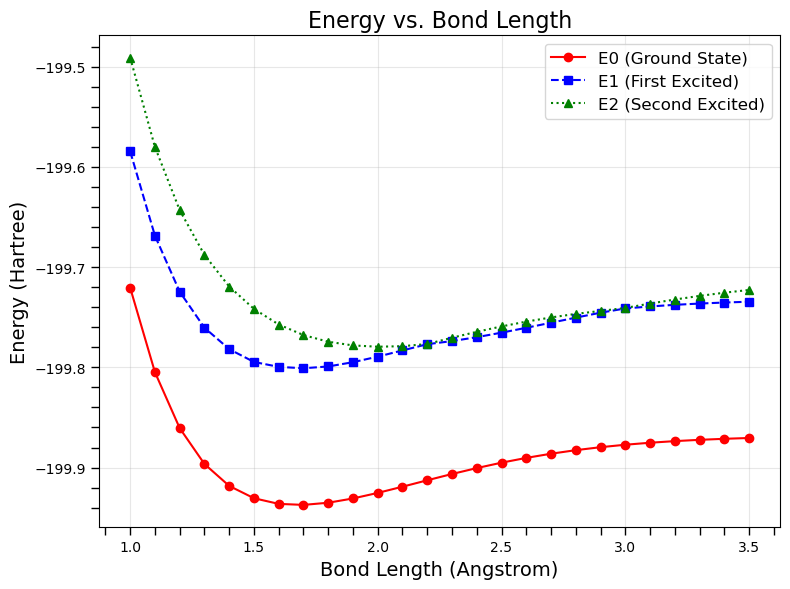

In [2]:
dmrg_cavity_free_json_file = "QED-DMRG/mghplus_dmrg_ccpVDZ.json"  # Replace with your JSON filename
dmrg_cavity_med_json_file = "QED-DMRG/mghplus_dmrg_ccpVDZ_lz_0.01_om_0.136.json"
dmrg_cavity_str_json_file = "QED-DMRG/mghplus_dmrg_ccpVDZ_lz_0.05_om_0.136.json"


plot_file = "mghplus_dmrg_ccpVDZ.png"


cavity_free_data = load_data_from_json(dmrg_cavity_free_json_file)
medium_cav_data = load_data_from_json(dmrg_cavity_med_json_file)
strong_cav_data = load_data_from_json(dmrg_cavity_str_json_file)


if cavity_free_data:
    create_energy_plot(cavity_free_data, output_filename=plot_file)

In [3]:

dmrg_cavity_free_json_file = "QED-DMRG/mghplus_dmrg_ccpVDZ.json"  # Replace with your JSON filename
dmrg_cavity_med_json_file = "QED-DMRG/mghplus_dmrg_ccpVDZ_lz_0.01_om_0.136.json"
dmrg_cavity_str_json_file = "QED-DMRG/mghplus_dmrg_ccpVDZ_lz_0.05_om_0.136.json"


casci_cavity_free_json_file = "QED-CASCI/mghplus_casci_ccpVDZ_lz_0_om_0.json"  # Replace with your JSON filename
casci_cavity_med_json_file = "QED-CASCI/mghplus_casci_ccpVDZ_lz_0.01_om_0.136.json"
casci_cavity_str_json_file = "QED-CASCI/mghplus_casci_ccpVDZ_lz_0.05_om_0.136.json"

casscf_cavity_free_json_file = "QED-CASSCF/mghplus_casscf_ccpVDZ_lz_0_om_0.json"  # Replace with your JSON filename
casscf_cavity_med_json_file = "QED-CASSCF/mghplus_casscf_ccpVDZ_lz_0.01_om_0.136.json"
casscf_cavity_str_json_file = "QED-CASSCF/mghplus_casscf_ccpVDZ_lz_0.05_om_0.136.json"

# Load DMRG data
dmrg_cavity_free_data = load_data_from_json(dmrg_cavity_free_json_file)
dmrg_cavity_med_data  = load_data_from_json(dmrg_cavity_med_json_file)
dmrg_cavity_str_data  = load_data_from_json(dmrg_cavity_str_json_file)

# Load CASCI data
casci_cavity_free_data = load_data_from_json(casci_cavity_free_json_file)
casci_cavity_med_data  = load_data_from_json(casci_cavity_med_json_file)
casci_cavity_str_data  = load_data_from_json(casci_cavity_str_json_file)

# Load CASSCF data
casscf_cavity_free_data = load_data_from_json(casscf_cavity_free_json_file)
casscf_cavity_med_data  = load_data_from_json(casscf_cavity_med_json_file)
casscf_cavity_str_data  = load_data_from_json(casscf_cavity_str_json_file)


In [4]:

import matplotlib as mpl

# Use a professional font and improve overall aesthetics
mpl.rcParams.update({
    "text.usetex": False,  # Set to True if using LaTeX rendering
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.dpi": 300,
    "lines.linewidth": 2,
    "lines.markersize": 6,
})

color3 = "rebeccapurple"
color2 = "salmon"
color1 = "forestgreen"
color4 = "dodgerblue"
color5 = "orangered"

# Define styles
styles = {
    "QED-DMRG": {"color": color4, "linestyle": "-", "marker": "o", "markerfacecolor":color4},
    "QED-CASCI": {"color": color3, "linestyle": "-", "marker": "s", "markerfacecolor":"none"},
    "QED-CASSCF": {"color": color5, "linestyle": "-", "marker": "^", "markerfacecolor":"none"},
}




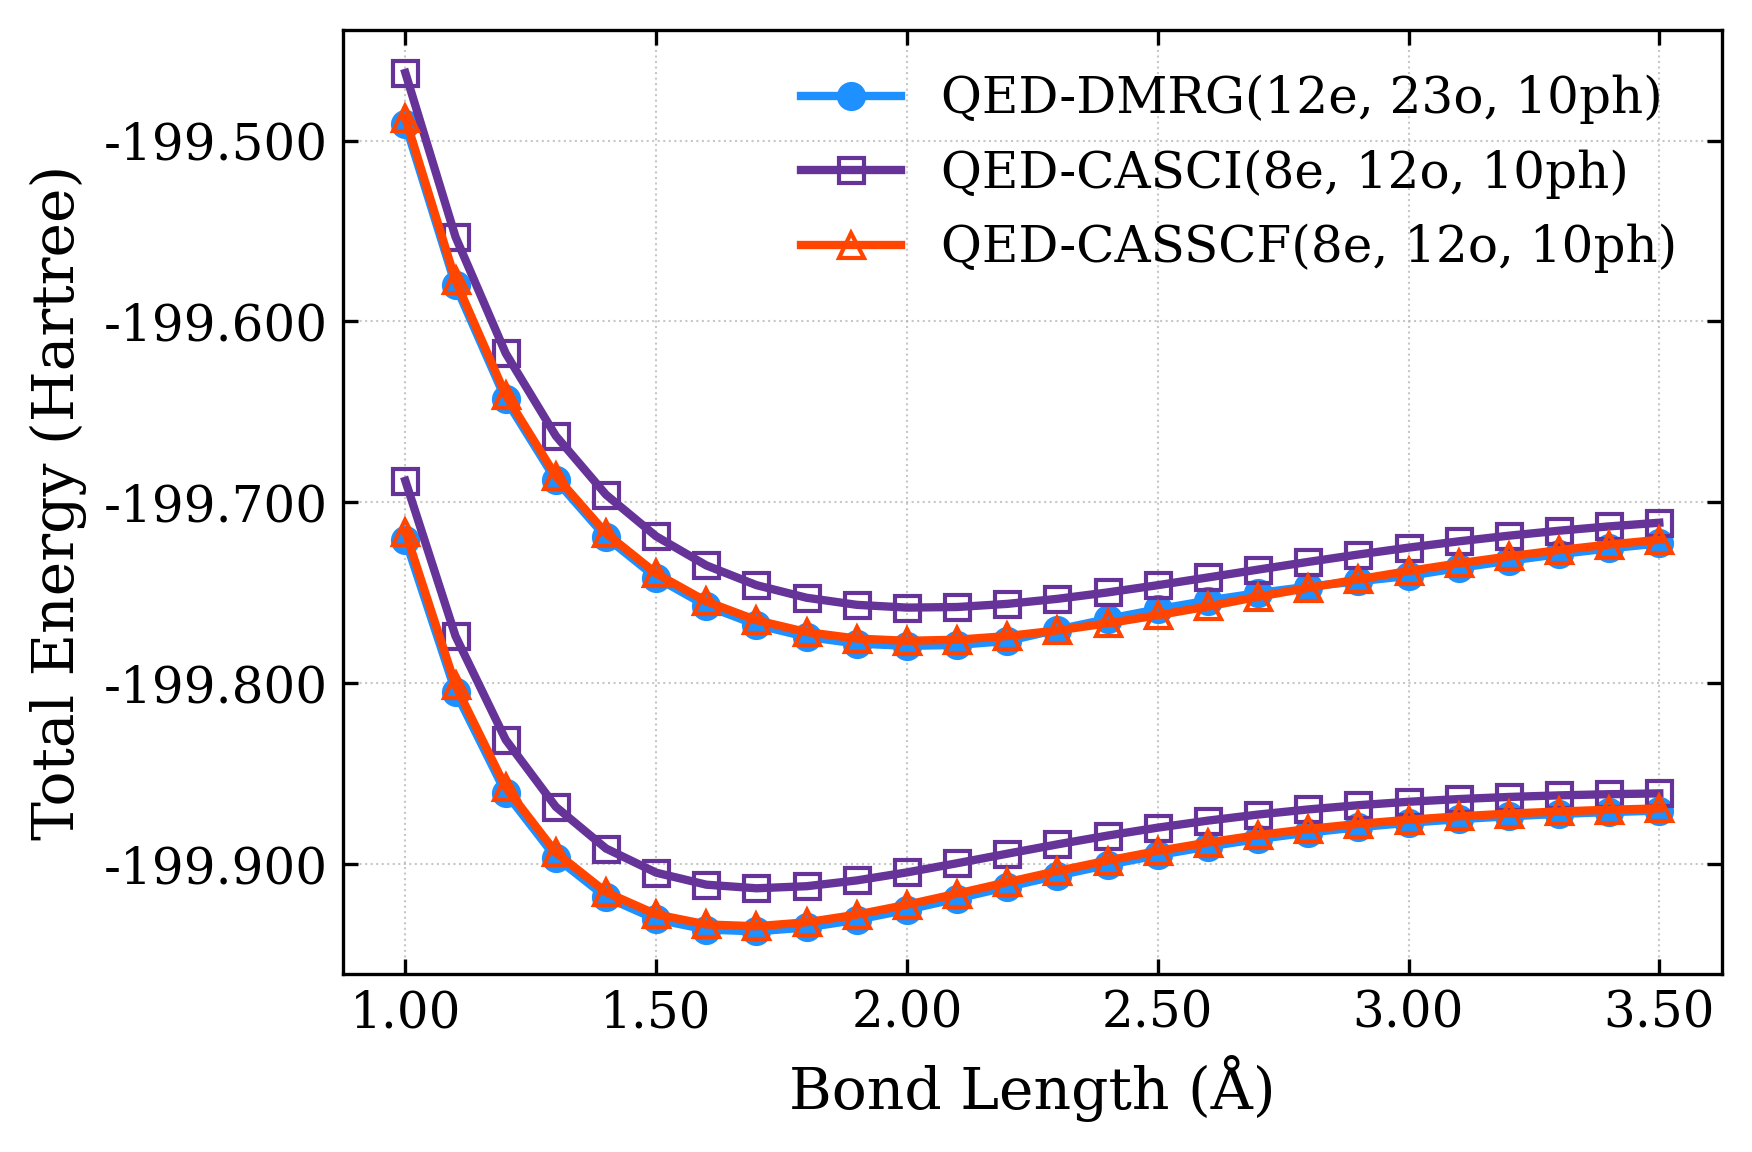

In [5]:

# Plot of S1 state from DMRG, CASCI, and CASSCF (cavity free).  
# Note that for DMRG, E1 is S0 + omega and E2 is S1
# and for CAS methods, E1 is S1
omega = 0.136
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(dmrg_cavity_free_data['bond_lengths'], dmrg_cavity_free_data['E0'],
        label=r"QED-DMRG(12e, 23o, 10ph)", **styles["QED-DMRG"])
ax.plot(dmrg_cavity_free_data['bond_lengths'], dmrg_cavity_free_data['E2'],
        **styles["QED-DMRG"])

ax.plot(casci_cavity_free_data['bond_lengths'], casci_cavity_free_data['E0'],
        label=r"QED-CASCI(8e, 12o, 10ph)", **styles["QED-CASCI"])
ax.plot(casci_cavity_free_data['bond_lengths'], casci_cavity_free_data['E1'],
        **styles["QED-CASCI"])

ax.plot(casscf_cavity_free_data['bond_lengths'], casscf_cavity_free_data['E0'],
        label=r"QED-CASSCF(8e, 12o, 10ph)", **styles["QED-CASSCF"])
ax.plot(casscf_cavity_free_data['bond_lengths'], casscf_cavity_free_data['E1'],
        **styles["QED-CASSCF"])

# Customize
ax.set_xlabel("Bond Length (Å)")
ax.set_ylabel("Total Energy (Hartree)")
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax.legend(frameon=False, loc='best')
ax.tick_params(direction='in', top=True, right=True)

# Save to file
fig.tight_layout()
#fig.savefig("qed_methods_energy_vs_bondlength.pdf", format='pdf')
fig.savefig("cavity_free_states_vs_bondlength.png", format='png', dpi=600)

# Show the plot
plt.show()


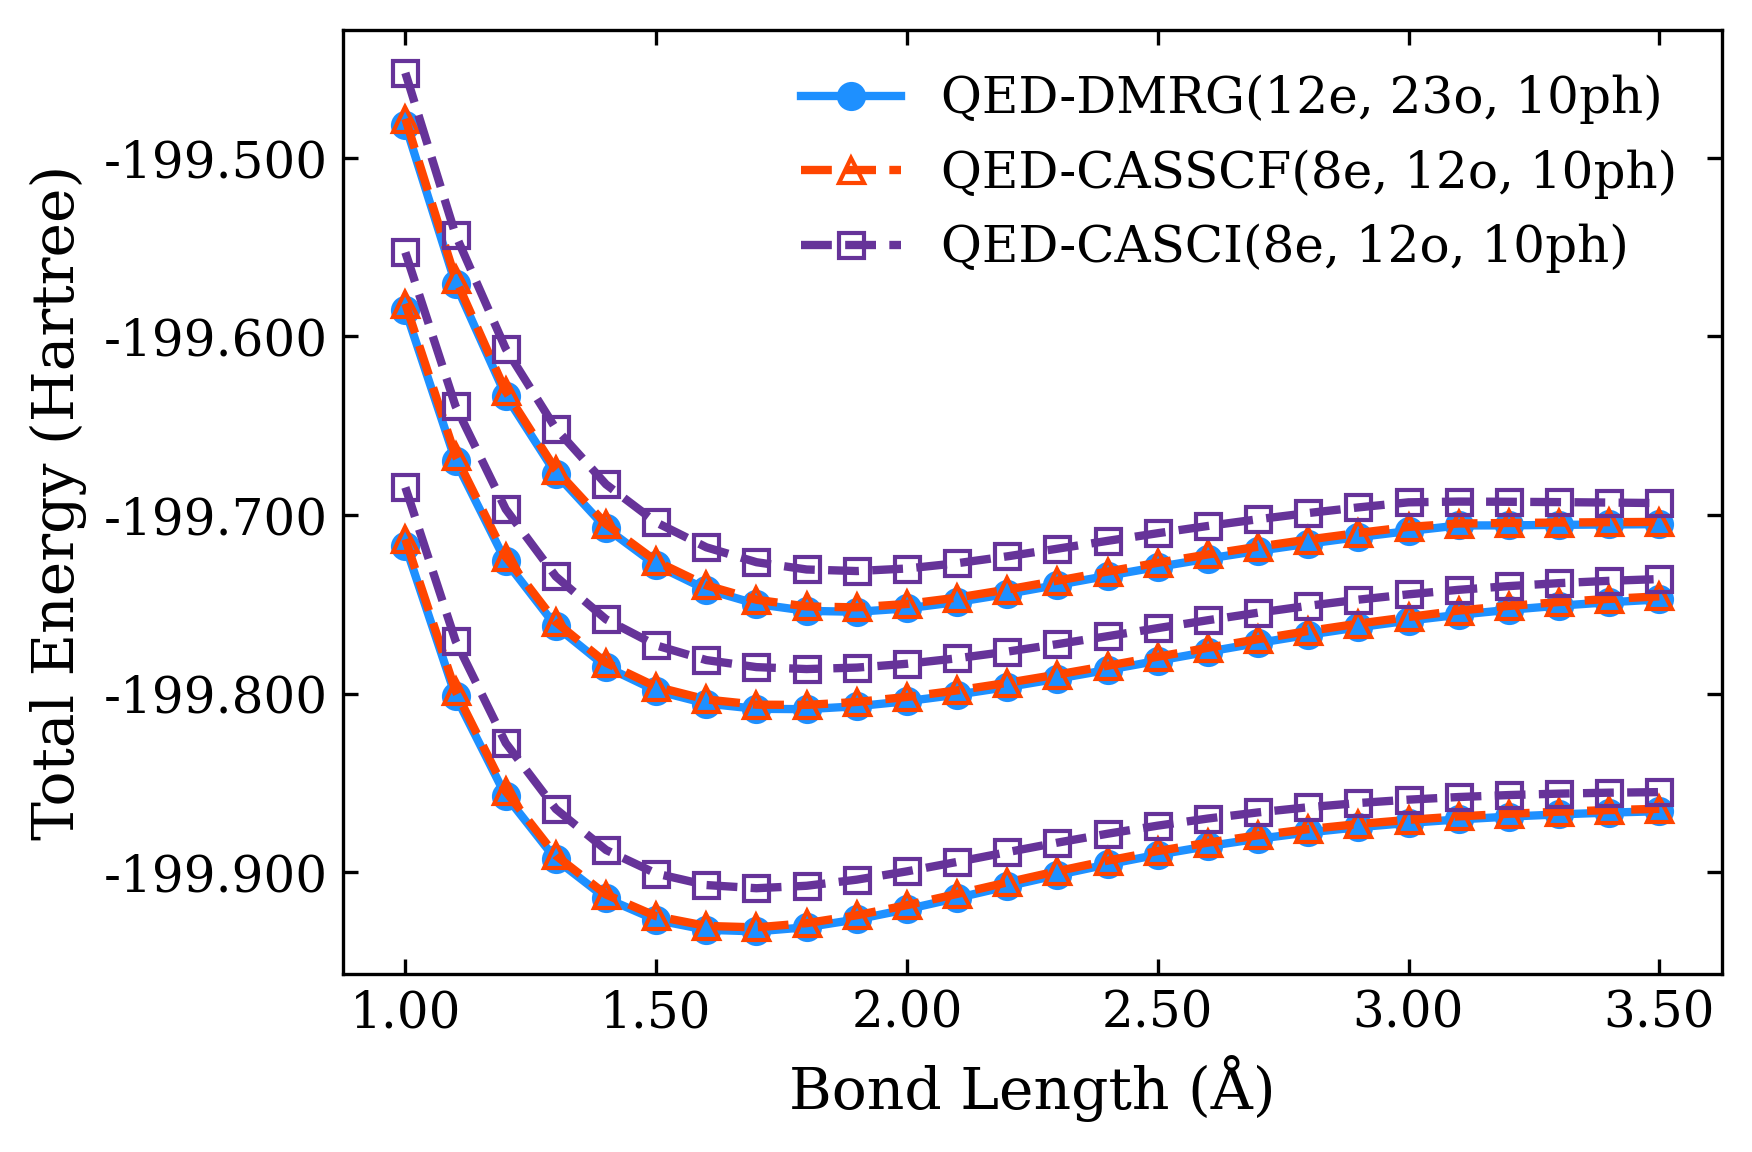

In [6]:
styles = {
    "QED-DMRG": {"color": color4, "linestyle": "-", "marker": "o", "markerfacecolor":color4},
    "QED-CASCI": {"color": color3, "linestyle": "--", "marker": "s", "markerfacecolor":"none"},
    "QED-CASSCF": {"color": color5, "linestyle": "--", "marker": "^", "markerfacecolor":"none"},
}

# plot the polariton states with CASSCF and DMRG

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(dmrg_cavity_str_data['bond_lengths'], dmrg_cavity_str_data['E0'],
        label=r"QED-DMRG(12e, 23o, 10ph)", **styles["QED-DMRG"])
ax.plot(dmrg_cavity_str_data['bond_lengths'], dmrg_cavity_str_data['E1'],
         **styles["QED-DMRG"])
ax.plot(dmrg_cavity_str_data['bond_lengths'], dmrg_cavity_str_data['E2'],
         **styles["QED-DMRG"])

ax.plot(casscf_cavity_str_data['bond_lengths'], casscf_cavity_str_data['E0'],
        label=r"QED-CASSCF(8e, 12o, 10ph)", **styles["QED-CASSCF"])
ax.plot(casscf_cavity_str_data['bond_lengths'], casscf_cavity_str_data['E1'],
        **styles["QED-CASSCF"])
ax.plot(casscf_cavity_str_data['bond_lengths'], casscf_cavity_str_data['E2'],
        **styles["QED-CASSCF"])

ax.plot(casscf_cavity_str_data['bond_lengths'], casci_cavity_str_data['E0'],
        label=r"QED-CASCI(8e, 12o, 10ph)", **styles["QED-CASCI"])
ax.plot(casscf_cavity_str_data['bond_lengths'], casci_cavity_str_data['E1'],
        **styles["QED-CASCI"])
ax.plot(casscf_cavity_str_data['bond_lengths'], casci_cavity_str_data['E2'],
        **styles["QED-CASCI"])
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
# Customize
ax.set_xlabel("Bond Length (Å)")
ax.set_ylabel("Total Energy (Hartree)")
#ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax.legend(frameon=False, loc='best')

ax.tick_params(direction='in', top=True, right=True)
fig.tight_layout()
#fig.savefig("qed_methods_energy_vs_bondlength.pdf", format='pdf')
fig.savefig("all_states_str_vs_bondlength.svg", format='svg', dpi=600)
plt.show()

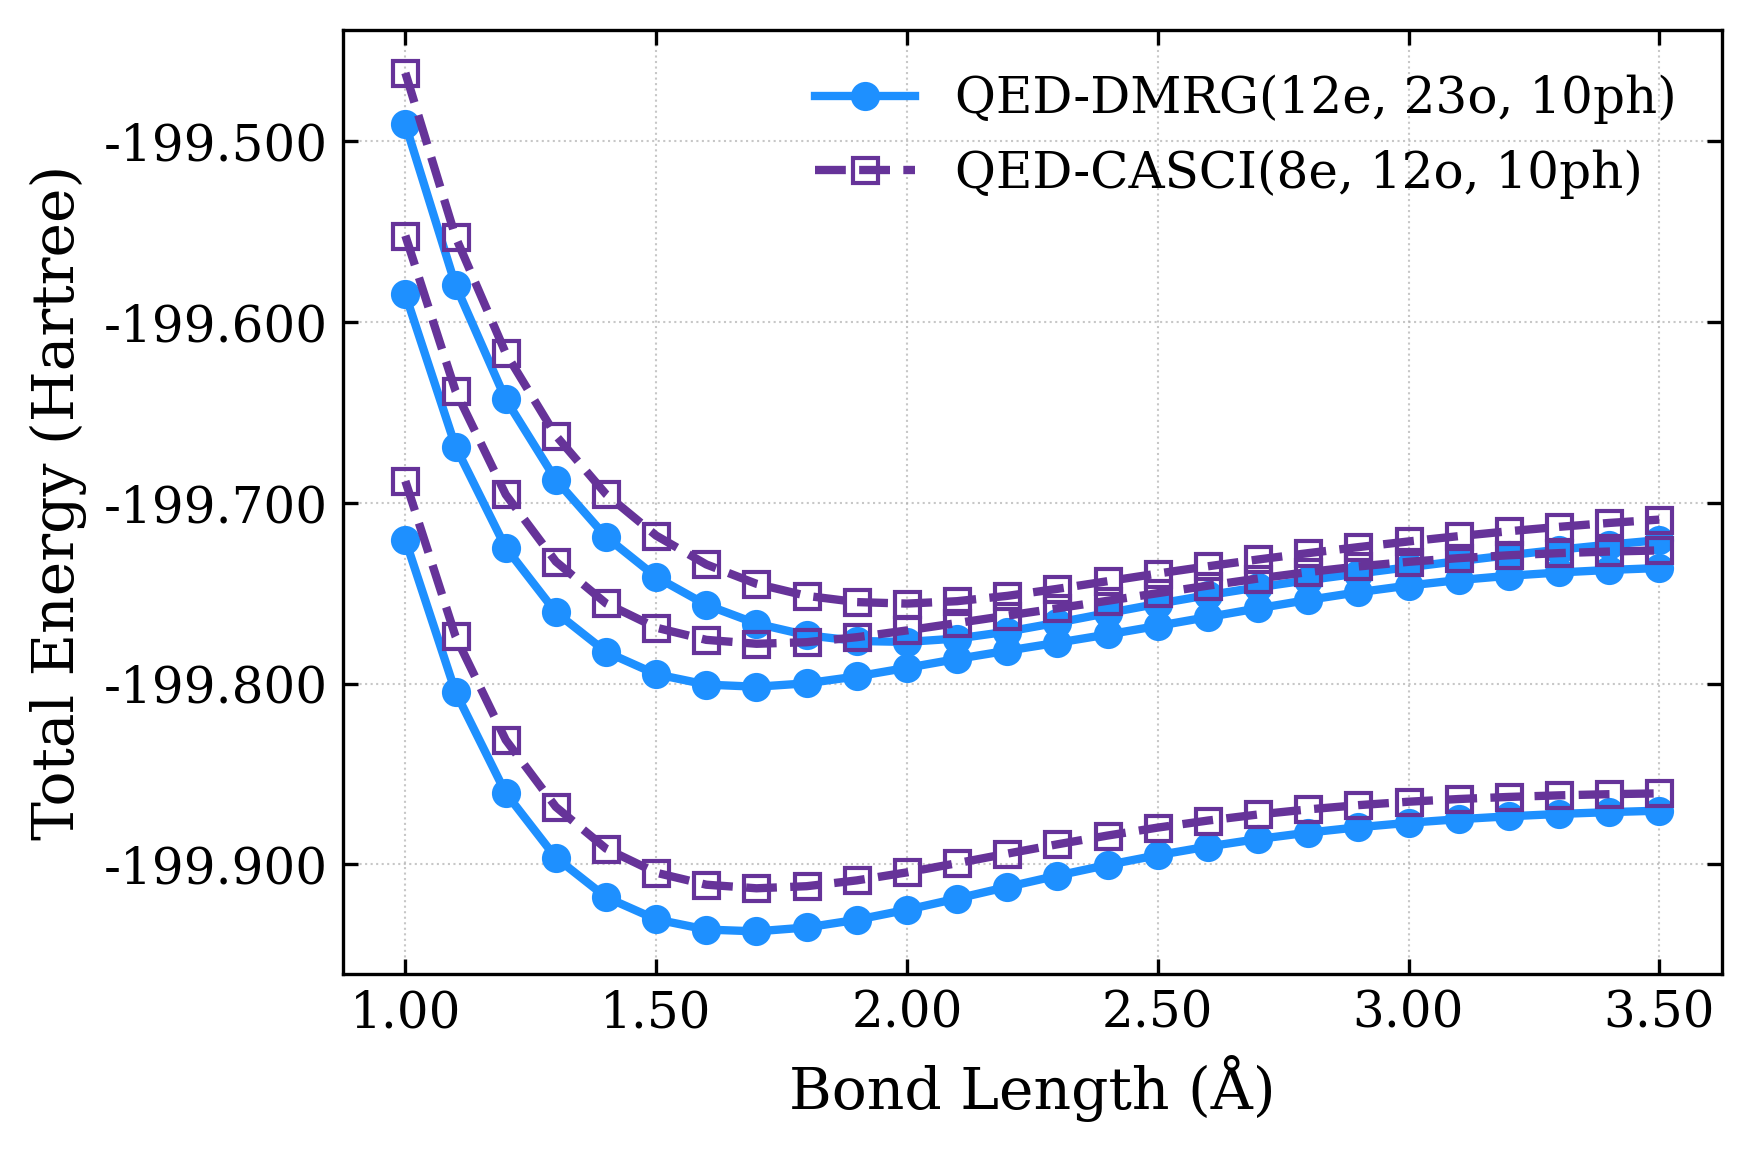

In [7]:
styles = {
    "QED-DMRG": {"color": color4, "linestyle": "-", "marker": "o", "markerfacecolor":color4},
    "QED-CASCI": {"color": color3, "linestyle": "--", "marker": "s", "markerfacecolor":"none"},
    "QED-CASSCF": {"color": color5, "linestyle": "--", "marker": "^", "markerfacecolor":"none"},
}

# plot the polariton states with CASSCF and DMRG

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(dmrg_cavity_str_data['bond_lengths'], dmrg_cavity_med_data['E0'],
        label=r"QED-DMRG(12e, 23o, 10ph)", **styles["QED-DMRG"])
ax.plot(dmrg_cavity_str_data['bond_lengths'], dmrg_cavity_med_data['E1'],
         **styles["QED-DMRG"])
ax.plot(dmrg_cavity_str_data['bond_lengths'], dmrg_cavity_med_data['E2'],
         **styles["QED-DMRG"])


ax.plot(casscf_cavity_str_data['bond_lengths'], casci_cavity_med_data['E0'],
        label=r"QED-CASCI(8e, 12o, 10ph)", **styles["QED-CASCI"])
ax.plot(casscf_cavity_str_data['bond_lengths'], casci_cavity_med_data['E1'],
        **styles["QED-CASCI"])
ax.plot(casscf_cavity_str_data['bond_lengths'], casci_cavity_med_data['E2'],
        **styles["QED-CASCI"])
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
# Customize
ax.set_xlabel("Bond Length (Å)")
ax.set_ylabel("Total Energy (Hartree)")
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax.legend(frameon=False, loc='best')
ax.tick_params(direction='in', top=True, right=True)
fig.tight_layout()
#fig.savefig("qed_methods_energy_vs_bondlength.pdf", format='pdf')
fig.savefig("casci_dmrg_all_states_str_bondlength.png", format='png', dpi=600)
plt.show()

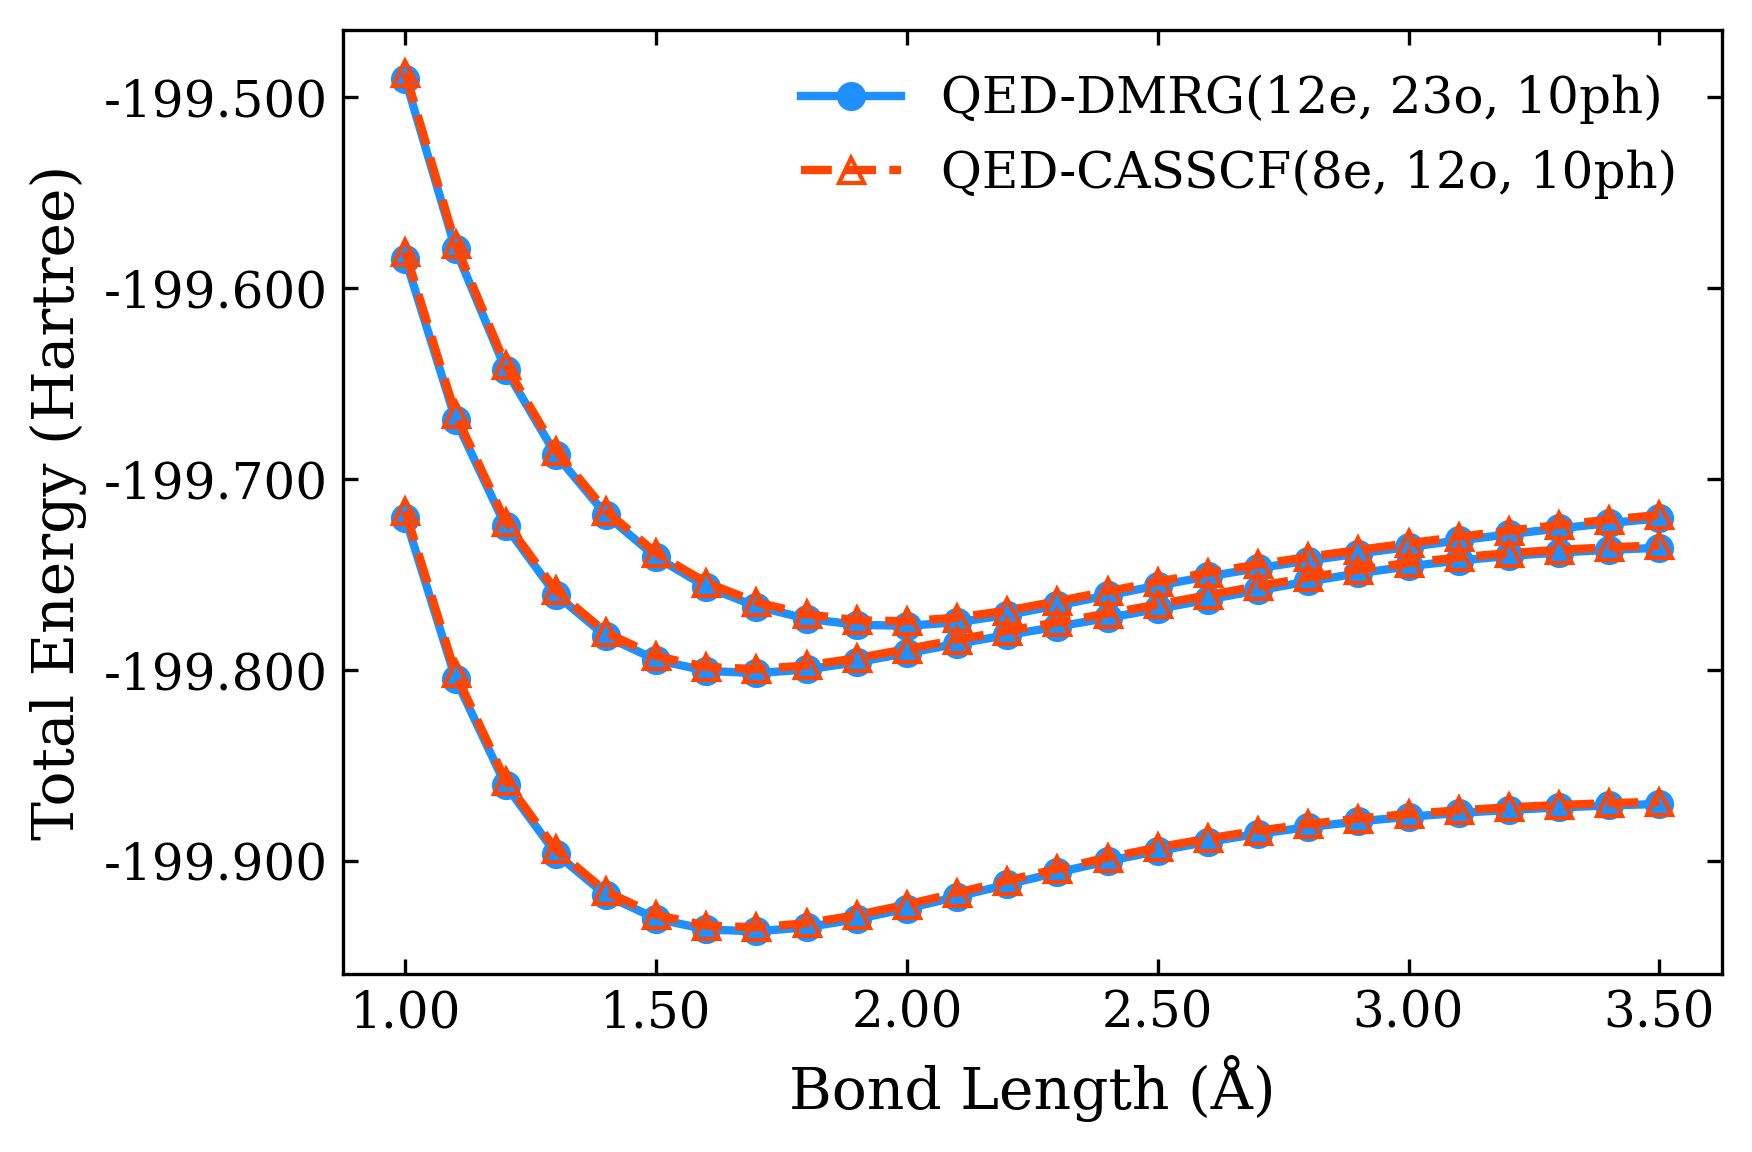

In [7]:
styles = {
    "QED-DMRG": {"color": color4, "linestyle": "-", "marker": "o", "markerfacecolor":color4},
    "QED-CASCI": {"color": color3, "linestyle": "--", "marker": "s", "markerfacecolor":"none"},
    "QED-CASSCF": {"color": color5, "linestyle": "--", "marker": "^", "markerfacecolor":"none"},
}

# plot the polariton states with CASSCF and DMRG

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(dmrg_cavity_str_data['bond_lengths'], dmrg_cavity_med_data['E0'],
        label=r"QED-DMRG(12e, 23o, 10ph)", **styles["QED-DMRG"])
ax.plot(dmrg_cavity_str_data['bond_lengths'], dmrg_cavity_med_data['E1'],
         **styles["QED-DMRG"])
ax.plot(dmrg_cavity_str_data['bond_lengths'], dmrg_cavity_med_data['E2'],
         **styles["QED-DMRG"])

ax.plot(casscf_cavity_str_data['bond_lengths'], casscf_cavity_med_data['E0'],
        label=r"QED-CASSCF(8e, 12o, 10ph)", **styles["QED-CASSCF"])
ax.plot(casscf_cavity_str_data['bond_lengths'], casscf_cavity_med_data['E1'],
        **styles["QED-CASSCF"])
ax.plot(casscf_cavity_str_data['bond_lengths'], casscf_cavity_med_data['E2'],
        **styles["QED-CASSCF"])

# Customize
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_xlabel("Bond Length (Å)")
ax.set_ylabel("Total Energy (Hartree)")
#ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax.legend(frameon=False, loc='best')
ax.tick_params(direction='in', top=True, right=True)
fig.tight_layout()
#fig.savefig("qed_methods_energy_vs_bondlength.pdf", format='pdf')
fig.savefig("casscf_dmrg_all_states_str_bondlength.svg", format='svg', dpi=600)
plt.show()

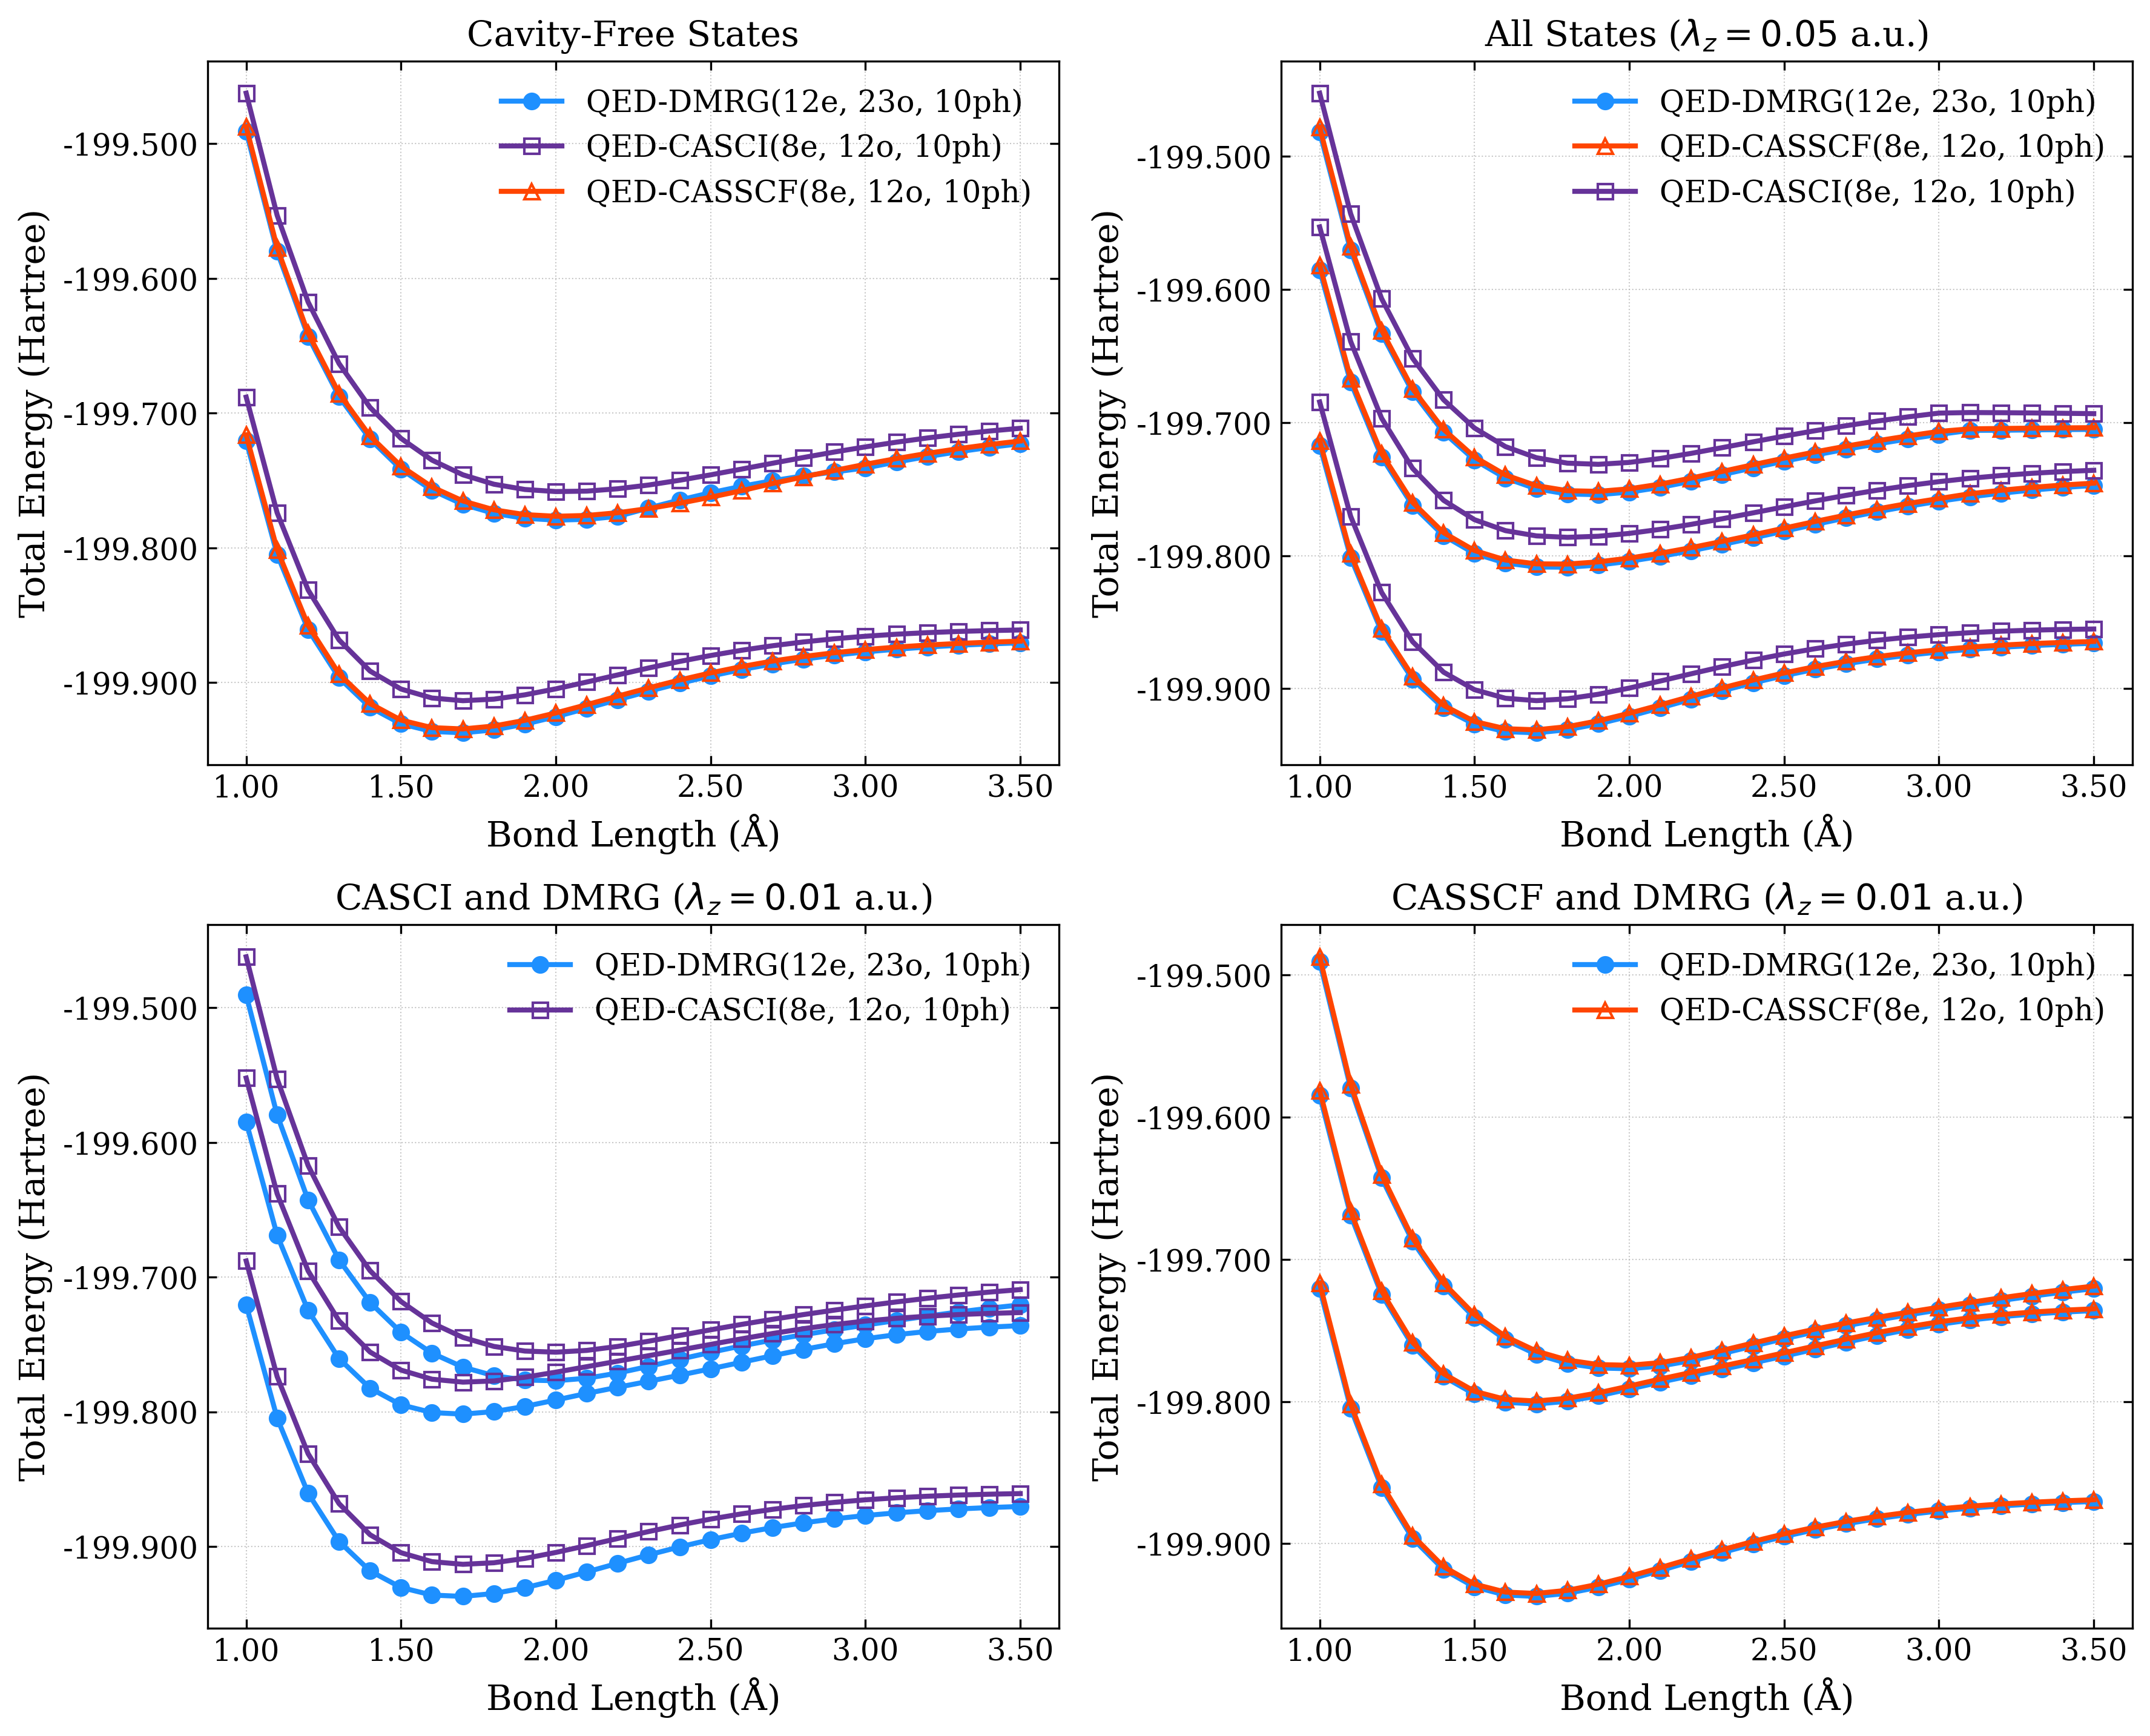

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np

# Common styles and colors
color3 = "rebeccapurple"
color2 = "salmon"
color1 = "forestgreen"
color4 = "dodgerblue"
color5 = "orangered"

# Define styles
styles = {
    "QED-DMRG": {"color": color4, "linestyle": "-", "marker": "o", "markerfacecolor": color4},
    "QED-CASCI": {"color": color3, "linestyle": "-", "marker": "s", "markerfacecolor": "none"},
    "QED-CASSCF": {"color": color5, "linestyle": "-", "marker": "^", "markerfacecolor": "none"},
}

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Make the axes accessible as a 1D array for easy iteration
axs = axs.flatten()

# Plot 1: Cavity-free states vs bond length (Top left)
axs[0].plot(dmrg_cavity_free_data['bond_lengths'], dmrg_cavity_free_data['E0'],
        label=r"QED-DMRG(12e, 23o, 10ph)", **styles["QED-DMRG"])
axs[0].plot(dmrg_cavity_free_data['bond_lengths'], dmrg_cavity_free_data['E2'],
        **styles["QED-DMRG"])
axs[0].plot(casci_cavity_free_data['bond_lengths'], casci_cavity_free_data['E0'],
        label=r"QED-CASCI(8e, 12o, 10ph)", **styles["QED-CASCI"])
axs[0].plot(casci_cavity_free_data['bond_lengths'], casci_cavity_free_data['E1'],
        **styles["QED-CASCI"])
axs[0].plot(casscf_cavity_free_data['bond_lengths'], casscf_cavity_free_data['E0'],
        label=r"QED-CASSCF(8e, 12o, 10ph)", **styles["QED-CASSCF"])
axs[0].plot(casscf_cavity_free_data['bond_lengths'], casscf_cavity_free_data['E1'],
        **styles["QED-CASSCF"])
axs[0].set_title("Cavity-Free States")
axs[0].set_xlabel("Bond Length (Å)")
axs[0].set_ylabel("Total Energy (Hartree)")
axs[0].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axs[0].grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
axs[0].legend(frameon=False, loc='best')
axs[0].tick_params(direction='in', top=True, right=True)

# Plot 2: All states with strong coupling (Top right)
axs[1].plot(dmrg_cavity_str_data['bond_lengths'], dmrg_cavity_str_data['E0'],
        label=r"QED-DMRG(12e, 23o, 10ph)", **styles["QED-DMRG"])
axs[1].plot(dmrg_cavity_str_data['bond_lengths'], dmrg_cavity_str_data['E1'],
         **styles["QED-DMRG"])
axs[1].plot(dmrg_cavity_str_data['bond_lengths'], dmrg_cavity_str_data['E2'],
         **styles["QED-DMRG"])
axs[1].plot(casscf_cavity_str_data['bond_lengths'], casscf_cavity_str_data['E0'],
        label=r"QED-CASSCF(8e, 12o, 10ph)", **styles["QED-CASSCF"])
axs[1].plot(casscf_cavity_str_data['bond_lengths'], casscf_cavity_str_data['E1'],
        **styles["QED-CASSCF"])
axs[1].plot(casscf_cavity_str_data['bond_lengths'], casscf_cavity_str_data['E2'],
        **styles["QED-CASSCF"])
axs[1].plot(casscf_cavity_str_data['bond_lengths'], casci_cavity_str_data['E0'],
        label=r"QED-CASCI(8e, 12o, 10ph)", **styles["QED-CASCI"])
axs[1].plot(casscf_cavity_str_data['bond_lengths'], casci_cavity_str_data['E1'],
        **styles["QED-CASCI"])
axs[1].plot(casscf_cavity_str_data['bond_lengths'], casci_cavity_str_data['E2'],
        **styles["QED-CASCI"])
axs[1].set_title("All States ($\lambda_z = 0.05$ a.u.)")
axs[1].set_xlabel("Bond Length (Å)")
axs[1].set_ylabel("Total Energy (Hartree)")
axs[1].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axs[1].grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
axs[1].legend(frameon=False, loc='best')
axs[1].tick_params(direction='in', top=True, right=True)

# Plot 3: CASCI and DMRG with medium coupling (Bottom left)
axs[2].plot(dmrg_cavity_str_data['bond_lengths'], dmrg_cavity_med_data['E0'],
        label=r"QED-DMRG(12e, 23o, 10ph)", **styles["QED-DMRG"])
axs[2].plot(dmrg_cavity_str_data['bond_lengths'], dmrg_cavity_med_data['E1'],
         **styles["QED-DMRG"])
axs[2].plot(dmrg_cavity_str_data['bond_lengths'], dmrg_cavity_med_data['E2'],
         **styles["QED-DMRG"])
axs[2].plot(casscf_cavity_str_data['bond_lengths'], casci_cavity_med_data['E0'],
        label=r"QED-CASCI(8e, 12o, 10ph)", **styles["QED-CASCI"])
axs[2].plot(casscf_cavity_str_data['bond_lengths'], casci_cavity_med_data['E1'],
        **styles["QED-CASCI"])
axs[2].plot(casscf_cavity_str_data['bond_lengths'], casci_cavity_med_data['E2'],
        **styles["QED-CASCI"])
axs[2].set_title("CASCI and DMRG ($\lambda_z = 0.01$ a.u.)")
axs[2].set_xlabel("Bond Length (Å)")
axs[2].set_ylabel("Total Energy (Hartree)")
axs[2].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[2].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axs[2].grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
axs[2].legend(frameon=False, loc='best')
axs[2].tick_params(direction='in', top=True, right=True)

# Plot 4: CASSCF and DMRG with medium coupling (Bottom right)
axs[3].plot(dmrg_cavity_str_data['bond_lengths'], dmrg_cavity_med_data['E0'],
        label=r"QED-DMRG(12e, 23o, 10ph)", **styles["QED-DMRG"])
axs[3].plot(dmrg_cavity_str_data['bond_lengths'], dmrg_cavity_med_data['E1'],
         **styles["QED-DMRG"])
axs[3].plot(dmrg_cavity_str_data['bond_lengths'], dmrg_cavity_med_data['E2'],
         **styles["QED-DMRG"])
axs[3].plot(casscf_cavity_str_data['bond_lengths'], casscf_cavity_med_data['E0'],
        label=r"QED-CASSCF(8e, 12o, 10ph)", **styles["QED-CASSCF"])
axs[3].plot(casscf_cavity_str_data['bond_lengths'], casscf_cavity_med_data['E1'],
        **styles["QED-CASSCF"])
axs[3].plot(casscf_cavity_str_data['bond_lengths'], casscf_cavity_med_data['E2'],
        **styles["QED-CASSCF"])
axs[3].set_title("CASSCF and DMRG ($\lambda_z = 0.01$ a.u.)")
axs[3].set_xlabel("Bond Length (Å)")
axs[3].set_ylabel("Total Energy (Hartree)")
axs[3].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[3].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axs[3].grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
axs[3].legend(frameon=False, loc='best')
axs[3].tick_params(direction='in', top=True, right=True)

# Add a main title for the entire figure
#fig.suptitle('QED Energy Analysis Across Different Methods', fontsize=16, y=0.98)

# Adjust the spacing between subplots
plt.tight_layout()
fig.subplots_adjust(top=0.93)  # Make room for the suptitle

# Save the combined figure with high resolution
fig.savefig("combined_qed_analysis.png", format='png', dpi=600, bbox_inches='tight')

plt.show()

In [10]:
# compute MAE for each coupling strength
au_to_kcal = 627.509474


In [11]:
casscf_mae_cavity_free_s0 = np.mean( np.abs(casscf_cavity_free_data['E0'] - dmrg_cavity_free_data['E0'])) * au_to_kcal
casscf_mae_cavity_free_s1 = np.mean( np.abs(casscf_cavity_free_data['E1'] - dmrg_cavity_free_data['E2'])) * au_to_kcal

casci_mae_cavity_free_s0 = np.mean( np.abs(casci_cavity_free_data['E0'] - dmrg_cavity_free_data['E0'])) * au_to_kcal
casci_mae_cavity_free_s1 = np.mean( np.abs(casci_cavity_free_data['E1'] - dmrg_cavity_free_data['E2'])) * au_to_kcal

casscf_mae_cavity_med_g = np.mean( np.abs(casscf_cavity_med_data['E0'] - dmrg_cavity_med_data['E0'])) * au_to_kcal
casscf_mae_cavity_med_lp = np.mean( np.abs(casscf_cavity_med_data['E1'] - dmrg_cavity_med_data['E1'])) * au_to_kcal
casscf_mae_cavity_med_up = np.mean( np.abs(casscf_cavity_med_data['E2'] - dmrg_cavity_med_data['E2'])) * au_to_kcal

casci_mae_cavity_med_g = np.mean( np.abs(casci_cavity_med_data['E0'] - dmrg_cavity_med_data['E0'])) * au_to_kcal
casci_mae_cavity_med_lp = np.mean( np.abs(casci_cavity_med_data['E1'] - dmrg_cavity_med_data['E1'])) * au_to_kcal
casci_mae_cavity_med_up = np.mean( np.abs(casci_cavity_med_data['E2'] - dmrg_cavity_med_data['E2'])) * au_to_kcal

casscf_mae_cavity_str_g = np.mean( np.abs(casscf_cavity_str_data['E0'] - dmrg_cavity_str_data['E0'])) * au_to_kcal
casscf_mae_cavity_str_lp = np.mean( np.abs(casscf_cavity_str_data['E1'] - dmrg_cavity_str_data['E1'])) * au_to_kcal
casscf_mae_cavity_str_up = np.mean( np.abs(casscf_cavity_str_data['E2'] - dmrg_cavity_str_data['E2'])) * au_to_kcal

casci_mae_cavity_str_g = np.mean( np.abs(casci_cavity_str_data['E0'] - dmrg_cavity_str_data['E0'])) * au_to_kcal
casci_mae_cavity_str_lp = np.mean( np.abs(casci_cavity_str_data['E1'] - dmrg_cavity_str_data['E1'])) * au_to_kcal
casci_mae_cavity_str_up = np.mean( np.abs(casci_cavity_str_data['E2'] - dmrg_cavity_str_data['E2'])) * au_to_kcal


In [12]:
# Abbreviated variable names for clarity
casscf_s0  = casscf_mae_cavity_free_s0
casscf_s1  = casscf_mae_cavity_free_s1
casci_s0   = casci_mae_cavity_free_s0
casci_s1   = casci_mae_cavity_free_s1

casscf_med_g  = casscf_mae_cavity_med_g
casscf_med_lp = casscf_mae_cavity_med_lp
casscf_med_up = casscf_mae_cavity_med_up
casci_med_g   = casci_mae_cavity_med_g
casci_med_lp  = casci_mae_cavity_med_lp
casci_med_up  = casci_mae_cavity_med_up

casscf_str_g  = casscf_mae_cavity_str_g
casscf_str_lp = casscf_mae_cavity_str_lp
casscf_str_up = casscf_mae_cavity_str_up
casci_str_g   = casci_mae_cavity_str_g
casci_str_lp  = casci_mae_cavity_str_lp
casci_str_up  = casci_mae_cavity_str_up


In [13]:
print(r"""\begin{{table}}[h]
\centering
\begin{{tabular}}{{lcc}}
\toprule
\multirow{{2}}{{*}}{{State}} & \multicolumn{{2}}{{c}}{{MAE (kcal/mol)}} \\
                             & QED-CASCI & QED-CASSCF \\
\midrule
\multicolumn{{3}}{{l}}{{\textbf{{Cavity-free}}}} \\
S$_0$                 & {:.3f} & {:.3f} \\
S$_1$                 & {:.3f} & {:.3f} \\
\midrule
\multicolumn{{3}}{{l}}{{\textbf{{Medium coupling}}}} \\
Ground                & {:.3f} & {:.3f} \\
Lower polariton       & {:.3f} & {:.3f} \\
Upper polariton       & {:.3f} & {:.3f} \\
\midrule
\multicolumn{{3}}{{l}}{{\textbf{{Strong coupling}}}} \\
Ground                & {:.3f} & {:.3f} \\
Lower polariton       & {:.3f} & {:.3f} \\
Upper polariton       & {:.3f} & {:.3f} \\
\bottomrule
\end{{tabular}}
\caption{{Mean absolute errors (MAE) in kcal/mol between QED-CASCI/QED-CASSCF and DMRG reference energies under different cavity coupling conditions.}}
\label{{tab:mae_cavity_conditions}}
\end{{table}}
""".format(
    casci_s0,  casscf_s0,
    casci_s1,  casscf_s1,
    casci_med_g,  casscf_med_g,
    casci_med_lp, casscf_med_lp,
    casci_med_up, casscf_med_up,
    casci_str_g,  casscf_str_g,
    casci_str_lp, casscf_str_lp,
    casci_str_up, casscf_str_up
))


\begin{table}[h]
\centering
\begin{tabular}{lcc}
\toprule
\multirow{2}{*}{State} & \multicolumn{2}{c}{MAE (kcal/mol)} \\
                             & QED-CASCI & QED-CASSCF \\
\midrule
\multicolumn{3}{l}{\textbf{Cavity-free}} \\
S$_0$                 & 11.825 & 1.519 \\
S$_1$                 & 11.620 & 1.485 \\
\midrule
\multicolumn{3}{l}{\textbf{Medium coupling}} \\
Ground                & 11.840 & 1.193 \\
Lower polariton       & 12.376 & 1.309 \\
Upper polariton       & 11.883 & 1.356 \\
\midrule
\multicolumn{3}{l}{\textbf{Strong coupling}} \\
Ground                & 12.316 & 1.305 \\
Lower polariton       & 12.692 & 1.447 \\
Upper polariton       & 12.617 & 1.385 \\
\bottomrule
\end{tabular}
\caption{Mean absolute errors (MAE) in kcal/mol between QED-CASCI/QED-CASSCF and DMRG reference energies under different cavity coupling conditions.}
\label{tab:mae_cavity_conditions}
\end{table}

